<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - AutoML H<sub>2</sub>O - Body Performance
</b></font> </br></p>

---


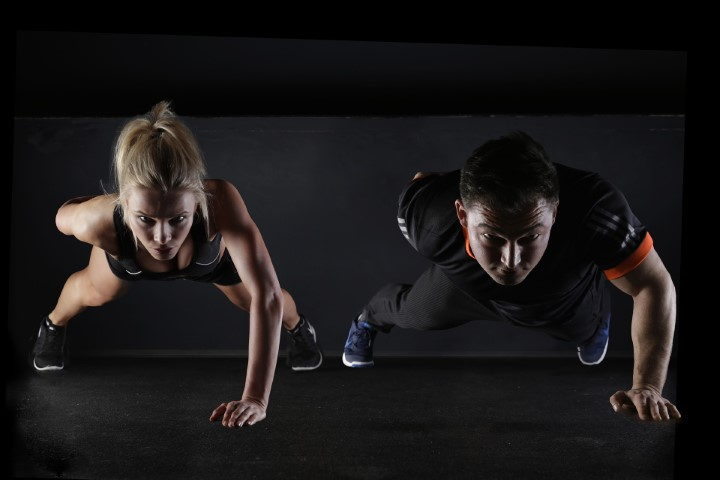

Bild von <a href="https://pixabay.com/de/users/5132824-5132824/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">5132824</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2264825">Pixabay</a>

# **1  <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>


Daten, die von der National Sports Promotion Foundation zum Gedenken an die Olympischen Spiele in Seoul verwaltet werden. Die Daten beinhatlten den Leistungsgrad, Altersgruppe, Größe, Gewicht, Sit-up, BMI und Weitsprung an Ort und Stelle, etc.


[DataSet](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)
[Info](https://www.kaggle.com/datasets/kukuroo3/body-performance-data)
[Quelle](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1)



In [2]:
import pandas as pd
data = pd.read_csv('/content/BodyPerformance.csv')
# data = h2o.import_file(path='/content/BodyPerformance.csv')

In [3]:
target = 'class'
features = [n for n in data.columns if n != target]

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.groupby('pclass').count()

In [ ]:
data[target].value_counts()

In [ ]:
_ = data.hist(figsize=(15,15))

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>


In [4]:
all_col = data.columns
num_col = data[features].select_dtypes(include='number').columns
cat_col = data[features].select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>

In [5]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

 <p><font color='black' size="5">
 H<sub>2</sub>O installieren
</font></p>

[Doku](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
[Tutorials](https://github.com/h2oai/h2o-tutorials)

In [6]:
%%capture
try:
  import h2o
  from h2o.automl import H2OAutoML
except:
  !pip install -q h2o
  import h2o
  from h2o.automl import H2OAutoML

 <p><font color='black' size="5">
 H<sub>2</sub>O Instanz erstellen
</font></p>


---

Die Initialisierung einer H<sub>2</sub>O-Instanz (Java Virtual Machine).

In [7]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_9dj9m5l
  JVM stdout: /tmp/tmp_9dj9m5l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_9dj9m5l/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_unknownUser_3q740d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


<p><font color='black' size="5">
Konvertieren DataFrame in H<sub>2</sub>O Frame
</font></p>

In [8]:
data_h2o = h2o.H2OFrame(data)
# data_h2o[target] = data_h2o[target].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [9]:
data_train, data_test = data_h2o.split_frame(ratios=[0.8], seed = 1)

In [13]:
data_train.describe()

Rows:10767
Cols:12

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
type,int,int,real,real,real,real,real,real,real,real,int,enum
mins,21.0,0.0,125.0,31.9,3.0,0.0,0.0,0.0,-25.0,0.0,0.0,
mean,36.712083217237975,0.6297018668152689,168.542750998421,67.41950404012219,23.233118325160156,78.677245286524,130.09045230797753,36.95151945760186,15.251401504597352,39.81006779975855,190.19466889569966,
maxs,64.0,1.0,193.8,138.1,54.9,126.0,201.0,70.5,213.0,80.0,303.0,
sigma,13.580795092824372,0.4829069107310164,8.428369221786255,11.923680688846385,7.205104871832268,10.73190204235496,14.743270578619263,10.636696704719556,8.492900014421423,14.277835817766512,39.70970264685862,
zeros,0,3987,0,0,0,1,1,3,11,103,8,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,27.0,1.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1.0,165.0,55.8,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,32.0,1.0,174.5,71.1,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B


<p><font color='black' size="5">
Modellerstellung & Training
</font></p>

In [14]:
model = H2OAutoML(max_runtime_secs =10*60, balance_classes=True, sort_metric='RMSE', seed =42)

In [16]:
%%time
model.train(training_frame = data_train, y = target)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 35.1 s, sys: 1.92 s, total: 37 s
Wall time: 10min 17s


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/12
# GBM base models (used / total),5/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Leaderboard
</font></p>


Das Leaderboard ist ein zentrales Objekt in H<sub>2</sub>O AutoML. Basierend auf der jeweiligen Aufgabe (Regression, binäre Klassifizierung, Mehrklassenklassifizierung) gibt das Leaderboard verschiedene Modellleistungsmetriken zurück. Weitere Informationen zu H<sub>2</sub>O-Modellmetriken finden Sie hier.

In [17]:
lb = model.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mean_per_class_error,logloss,mse
StackedEnsemble_AllModels_2_AutoML_1_20230621_155216,0.451711,0.25125,0.612248,0.204042
StackedEnsemble_AllModels_1_AutoML_1_20230621_155216,0.453206,0.251709,0.614565,0.205396
StackedEnsemble_BestOfFamily_3_AutoML_1_20230621_155216,0.453348,0.251255,0.615899,0.205524
StackedEnsemble_BestOfFamily_2_AutoML_1_20230621_155216,0.456739,0.254675,0.622219,0.208611
StackedEnsemble_AllModels_3_AutoML_1_20230621_155216,0.457776,0.252038,0.624071,0.209559
GBM_3_AutoML_1_20230621_155216,0.460183,0.258538,0.634832,0.211769
StackedEnsemble_BestOfFamily_1_AutoML_1_20230621_155216,0.461322,0.262837,0.634869,0.212818
GBM_4_AutoML_1_20230621_155216,0.461468,0.260657,0.639441,0.212953
GBM_2_AutoML_1_20230621_155216,0.463029,0.260425,0.635253,0.214395
XGBoost_3_AutoML_1_20230621_155216,0.466206,0.265624,0.643577,0.217348


<p><font color='black' size="5">
Das beste Modell
</font></p>

In [18]:
best_model = model.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20230621_155216


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       12/12
# GBM base models (used / total)           5/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsMultinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08227365935346996
RMSE: 0.28683385322076255
LogLoss: 0.2809043886037303
Null degrees o

In [19]:
best_model.model_performance(data_test)

ModelMetricsMultinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.2019008623954115
RMSE: 0.4493337984120619
LogLoss: 0.6092256615402548
Null degrees of freedom: 2625
Residual degrees of freedom: 2524
Null deviance: 7282.6753874107
Residual deviance: 3199.6531744094186
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
A    B    C    D    Error     Rate
---  ---  ---  ---  --------  -----------
549  69   10   2    0.128571  81 / 630
142  421  65   20   0.350309  227 / 648
56   126  447  24   0.315467  206 / 653
9    39   77   570  0.179856  125 / 695
756  655  599  616  0.243336  639 / 2,626

Top-4 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.756664
2    0.934882
3    0.989718
4    1

<p><font color='black' size="5">
Modell
</font></p>


H<sub>2</sub>O Explainability Interface ist ein praktischer Wrapper für eine Reihe von Erklärbarkeitsmethoden und Visualisierungen in H<sub>2</sub>O. Die h2o.explain()Funktion generiert eine Liste von Erklärungen – einzelne Erklärungseinheiten, wie z. B. ein Diagramm der teilweisen Abhängigkeit oder ein Diagramm der variablen Wichtigkeit.

In [20]:
explain_model = model.explain(frame = data_test, figsize = (8,6))

Output hidden; open in https://colab.research.google.com to view.

In [21]:
model.explain_row(frame = data_test, row_index = 15, figsize = (8,6))

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,A,B,C,D
StackedEnsemble_BestOfFamily_3_AutoML_1_20230621_155216,0.242075,0.612706,0.450919,0.203328,17286,0.293016,StackedEnsemble,A,0.869186,0.0800545,0.0413714,0.00938823
StackedEnsemble_AllModels_2_AutoML_1_20230621_155216,0.243551,0.609226,0.449334,0.201901,34260,0.799426,StackedEnsemble,A,0.871778,0.0773728,0.039318,0.011531
GBM_3_AutoML_1_20230621_155216,0.247931,0.635359,0.458241,0.209985,4647,0.121875,GBM,A,0.913396,0.0440422,0.0355649,0.00699685
GBM_4_AutoML_1_20230621_155216,0.249061,0.634707,0.457618,0.209414,5878,0.073847,GBM,A,0.895939,0.056033,0.0265057,0.0215225
StackedEnsemble_BestOfFamily_2_AutoML_1_20230621_155216,0.249301,0.62138,0.45463,0.206689,15288,0.162968,StackedEnsemble,A,0.872784,0.0855745,0.0341,0.00754165
StackedEnsemble_AllModels_1_AutoML_1_20230621_155216,0.249745,0.6163,0.45199,0.204295,25241,0.417382,StackedEnsemble,A,0.867896,0.0792624,0.041475,0.011367
GBM_2_AutoML_1_20230621_155216,0.252035,0.645446,0.463896,0.2152,4348,0.076477,GBM,A,0.862438,0.0799681,0.0440979,0.0134958
StackedEnsemble_BestOfFamily_1_AutoML_1_20230621_155216,0.255374,0.626203,0.455988,0.207925,14249,0.118864,StackedEnsemble,A,0.794735,0.126942,0.0579024,0.0204203
GBM_1_AutoML_1_20230621_155216,0.255382,0.634818,0.460994,0.212515,10320,0.11207,GBM,A,0.81332,0.0979849,0.0591742,0.0295211
XGBoost_3_AutoML_1_20230621_155216,0.256304,0.639757,0.462835,0.214216,3053,0.018879,XGBoost,A,0.851215,0.0950792,0.0429982,0.0107079


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms,algo,predict,A,B,C,D
StackedEnsemble_BestOfFamily_3_AutoML_1_20230621_155216,0.242075,0.612706,0.450919,0.203328,17286,0.293016,StackedEnsemble,A,0.869186,0.0800545,0.0413714,0.00938823
StackedEnsemble_AllModels_2_AutoML_1_20230621_155216,0.243551,0.609226,0.449334,0.201901,34260,0.799426,StackedEnsemble,A,0.871778,0.0773728,0.039318,0.011531
GBM_3_AutoML_1_20230621_155216,0.247931,0.635359,0.458241,0.209985,4647,0.121875,GBM,A,0.913396,0.0440422,0.0355649,0.00699685
GBM_4_AutoML_1_20230621_155216,0.249061,0.634707,0.457618,0.209414,5878,0.073847,GBM,A,0.895939,0.056033,0.0265057,0.0215225
StackedEnsemble_BestOfFamily_2_AutoML_1_20230621_155216,0.249301,0.62138,0.45463,0.206689,15288,0.162968,StackedEnsemble,A,0.872784,0.0855745,0.0341,0.00754165
StackedEnsemble_AllModels_1_AutoML_1_20230621_155216,0.249745,0.6163,0.45199,0.204295,25241,0.417382,StackedEnsemble,A,0.867896,0.0792624,0.041475,0.011367
GBM_2_AutoML_1_20230621_155216,0.252035,0.645446,0.463896,0.2152,4348,0.076477,GBM,A,0.862438,0.0799681,0.0440979,0.0134958
StackedEnsemble_BestOfFamily_1_AutoML_1_20230621_155216,0.255374,0.626203,0.455988,0.207925,14249,0.118864,StackedEnsemble,A,0.794735,0.126942,0.0579024,0.0204203
GBM_1_AutoML_1_20230621_155216,0.255382,0.634818,0.460994,0.212515,10320,0.11207,GBM,A,0.81332,0.0979849,0.0591742,0.0295211
XGBoost_3_AutoML_1_20230621_155216,0.256304,0.639757,0.462835,0.214216,3053,0.018879,XGBoost,A,0.851215,0.0950792,0.0429982,0.0107079


In [22]:
data_test[15,:]

age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
33,1,172.8,78.8,19.3,87,146,59.8,19.7,59,228,A


# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>